# 과제 : 집값 예측

목차
1. 문제 정의
2. 데이터 준비
3. 탐색적 데이터 분석
4. 데이터 전처리
5. 모델 훈련 및 예측
6. 평가

# 1. 문제 정의

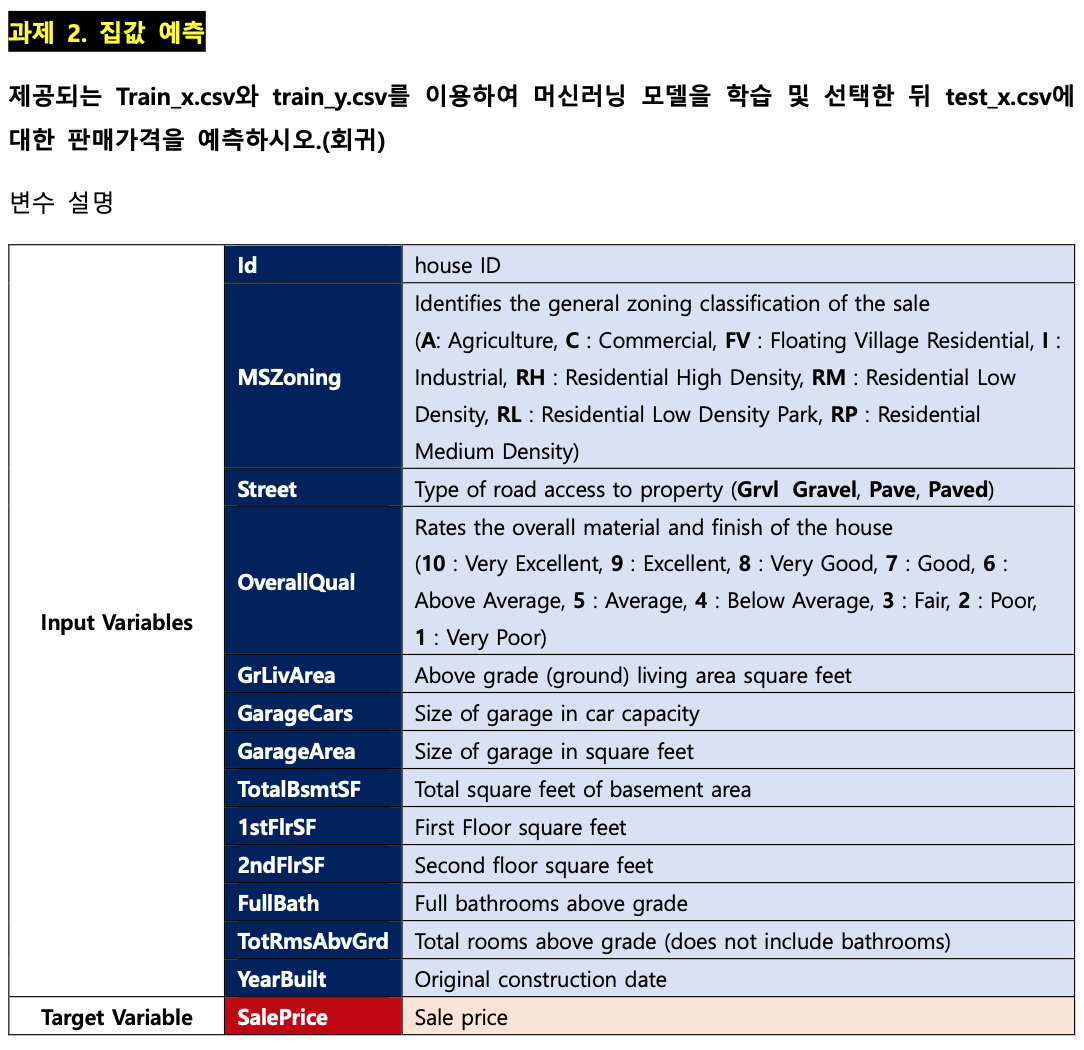

목표 : 집값 예측

# 2. 데이터 불러오기

In [1]:
# 기본적인 라이브러리 불러오기
import numpy as np
import pandas as pd

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 머신러닝 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
train_x = pd.read_csv('./data/train_x.csv')
train_y = pd.read_csv('./data/train_y.csv')
test_x = pd.read_csv('./datatest_x.csv')

In [3]:
train_x.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)
test_x.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)
train_y.drop('Unnamed: 0', axis=1, inplace=True)
train_x

,MSZoning,Street,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,RM,Pave,6,848,2,420,848,848,0,1,3,2004
1,RL,Pave,1,334,0,0,0,334,0,1,2,1946
2,RM,Pave,6,848,2,420,848,848,0,1,3,2004
3,RL,Pave,8,2090,2,556,1220,1220,870,2,8,1995
4,RM,Pave,4,988,1,297,462,526,462,1,5,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,5,970,2,624,970,970,0,1,5,1963
1164,RM,Pave,5,1302,1,280,630,630,672,2,6,1971
1165,RL,Pave,9,1792,3,874,1792,1792,0,2,6,2003
1166,RL,Pave,7,1949,2,574,1050,1062,887,2,8,1993


In [4]:
train_y

,SalePrice
0,149300
1,39300
2,155900
3,240000
4,91000
...,...
1163,132500
1164,112000
1165,374000
1166,236000


In [5]:
test_x

,MSZoning,Street,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,RM,Pave,6,1158,1,208,862,950,208,1,5,1929
1,RH,Pave,6,1482,1,400,672,810,672,2,7,1925
2,RL,Pave,8,1742,2,564,1742,1742,0,2,5,1985
3,RH,Pave,5,1964,0,0,940,1024,940,1,7,1911
4,RL,Pave,5,1367,1,384,861,961,406,1,7,1900
...,...,...,...,...,...,...,...,...,...,...,...,...
287,RL,Pave,5,912,1,352,912,912,0,1,4,1962
288,RM,Pave,5,825,2,720,825,825,0,1,4,1955
289,RL,Pave,8,1629,3,880,3206,1629,0,2,7,2003
290,RL,Pave,8,1852,3,660,1004,1004,848,2,7,1999


In [6]:
train_df = pd.concat([train_x, train_y], axis=1)
train_df

,MSZoning,Street,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
0,RM,Pave,6,848,2,420,848,848,0,1,3,2004,149300
1,RL,Pave,1,334,0,0,0,334,0,1,2,1946,39300
2,RM,Pave,6,848,2,420,848,848,0,1,3,2004,155900
3,RL,Pave,8,2090,2,556,1220,1220,870,2,8,1995,240000
4,RM,Pave,4,988,1,297,462,526,462,1,5,1973,91000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,5,970,2,624,970,970,0,1,5,1963,132500
1164,RM,Pave,5,1302,1,280,630,630,672,2,6,1971,112000
1165,RL,Pave,9,1792,3,874,1792,1792,0,2,6,2003,374000
1166,RL,Pave,7,1949,2,574,1050,1062,887,2,8,1993,236000


# 3. 탐색적 데이터 분석(EDA)

## 데이터 확인

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1168 non-null   object
 1   Street        1168 non-null   object
 2   OverallQual   1168 non-null   int64 
 3   GrLivArea     1168 non-null   int64 
 4   GarageCars    1168 non-null   int64 
 5   GarageArea    1168 non-null   int64 
 6   TotalBsmtSF   1168 non-null   int64 
 7   1stFlrSF      1168 non-null   int64 
 8   2ndFlrSF      1168 non-null   int64 
 9   FullBath      1168 non-null   int64 
 10  TotRmsAbvGrd  1168 non-null   int64 
 11  YearBuilt     1168 non-null   int64 
 12  SalePrice     1168 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 118.8+ KB


Categorical
- categorical : MSZoning, Street
- ordinal : X

Numerical
- continous : GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, YearBuilt
- Discrete : OverallQual, GarageCars, FullBath, TotRmsAbvGrd

In [8]:
train_df.isnull().sum()

MSZoning        0
Street          0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
SalePrice       0
dtype: int64

결측치 없음

In [9]:
train_x['MSZoning'].value_counts()

RL         925
RM         172
FV          52
RH          11
C (all)      8
Name: MSZoning, dtype: int64

RL : 주거용 저밀도 공원\
RM : 주거용 저밀도\
FV : 부유층 주택\
RH : 주거용 고밀도\
C : 상업


In [10]:
train_x['Street'].value_counts()

Pave    1162
Grvl       6
Name: Street, dtype: int64

Pave : 포장 도로\
Grvel : 비포장 도로

In [11]:
train_df.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.109589,1516.640411,1.772260,473.614726,1048.523116,1160.872432,349.919521,1.565925,6.522260,1971.677226,180905.357877
std,1.379856,519.508700,0.745981,211.256559,421.886896,375.445588,438.529388,0.553035,1.633891,29.871982,79741.244273
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,1872.000000,34900.000000
25%,5.000000,1131.000000,1.000000,336.000000,793.000000,888.000000,0.000000,1.000000,5.000000,1954.000000,130000.000000
50%,6.000000,1458.500000,2.000000,478.000000,990.000000,1092.000000,0.000000,2.000000,6.000000,1973.000000,162950.000000
75%,7.000000,1784.500000,2.000000,576.000000,1276.250000,1381.500000,731.000000,2.000000,7.000000,2000.250000,212225.000000
max,10.000000,4676.000000,4.000000,1390.000000,3200.000000,3228.000000,2065.000000,3.000000,14.000000,2010.000000,755000.000000


SalePrice의 편차가 굉장히 커보임 → 시각화 필요

## 데이터 시각화

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

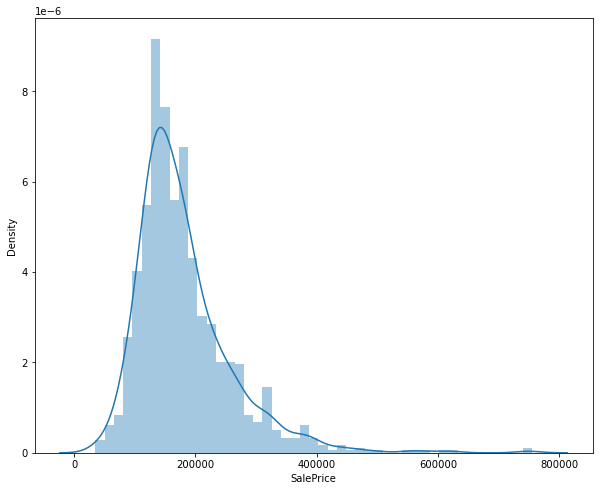

In [12]:
plt.figure(figsize=(10, 8))
sns.distplot(train_y['SalePrice'])

target data(Sale Price)는 정규분포 모양의 대칭 분포가 아니라 비대칭 분포임을 알 수 있음

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

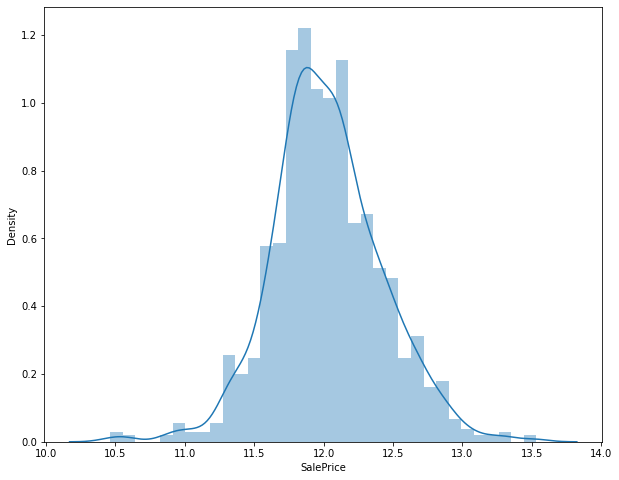

In [13]:
plt.figure(figsize=(10, 8))
log_SalePrice = np.log1p(train_y['SalePrice'])
sns.distplot(log_SalePrice)

높은 성능의 회귀 모형을 만들기 위해서 정규분포화 해야함 →  log1p를 이용하여 기존 SalePrice에 로그를 취해 정규분포화 할 수 있음

In [14]:
train_x_continuous = train_df.select_dtypes(exclude='object')
train_x_continuous

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
0,6,848,2,420,848,848,0,1,3,2004,149300
1,1,334,0,0,0,334,0,1,2,1946,39300
2,6,848,2,420,848,848,0,1,3,2004,155900
3,8,2090,2,556,1220,1220,870,2,8,1995,240000
4,4,988,1,297,462,526,462,1,5,1973,91000
...,...,...,...,...,...,...,...,...,...,...,...
1163,5,970,2,624,970,970,0,1,5,1963,132500
1164,5,1302,1,280,630,630,672,2,6,1971,112000
1165,9,1792,3,874,1792,1792,0,2,6,2003,374000
1166,7,1949,2,574,1050,1062,887,2,8,1993,236000


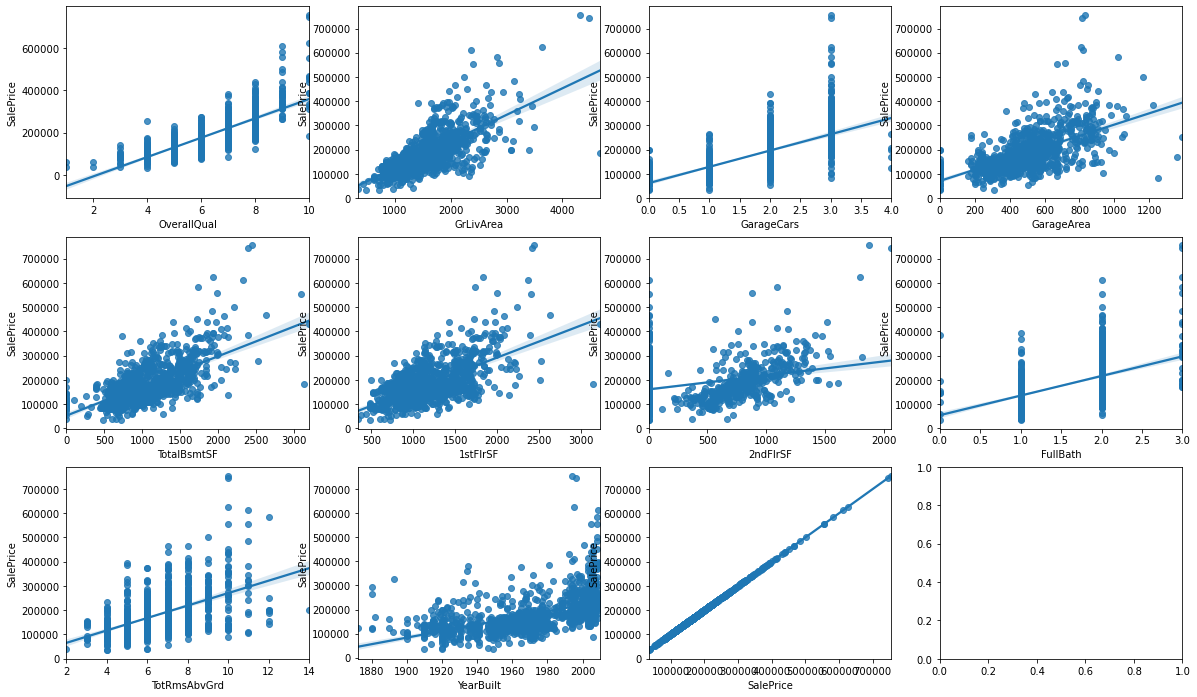

In [15]:
fig, axs = plt.subplots(figsize=(20, 12) , ncols=4 , nrows=3)
continuous_columns = train_x_continuous.columns
for i , feature in enumerate(continuous_columns):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature , y='SalePrice', data = train_df, ax=axs[row][col])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

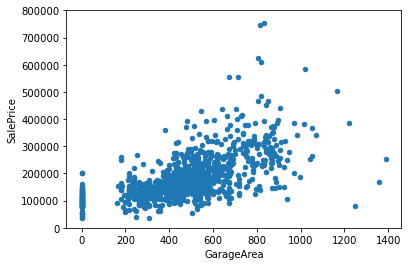

In [16]:
train_df.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000))

GarageArea 산점도 결과를 보면, GarageArea가 1200보다 클 때 SalePrice가 너무 낮은 이상치가 존재한다. → 이상치 제거 필요

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

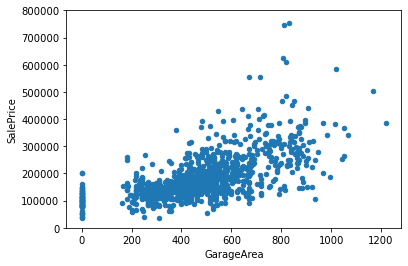

In [17]:
# GarageArea 이상치 제거
train_df = train_df[(train_df['GarageArea'] < 1200) | (train_df['SalePrice'] > 300000)]
train_df.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000))

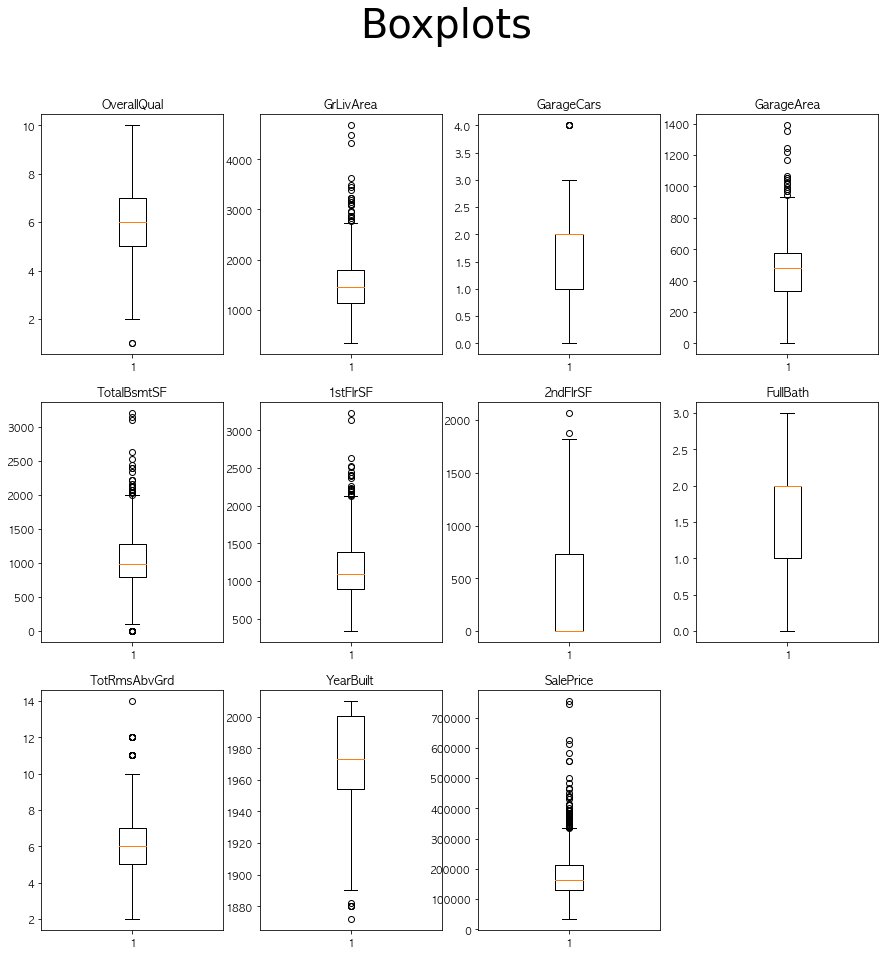

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots", fontsize=40)
plt.rcParams['font.family'] = 'AppleGothic'

cols = train_x_continuous.columns
for i in range(len(cols)):
    plt.subplot(3,4,i+1) #nrows = 3, ncols =1, index = i+1
    plt.title(cols[i])
    plt.boxplot(train_x_continuous[cols[i]])
plt.show()

array([[<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

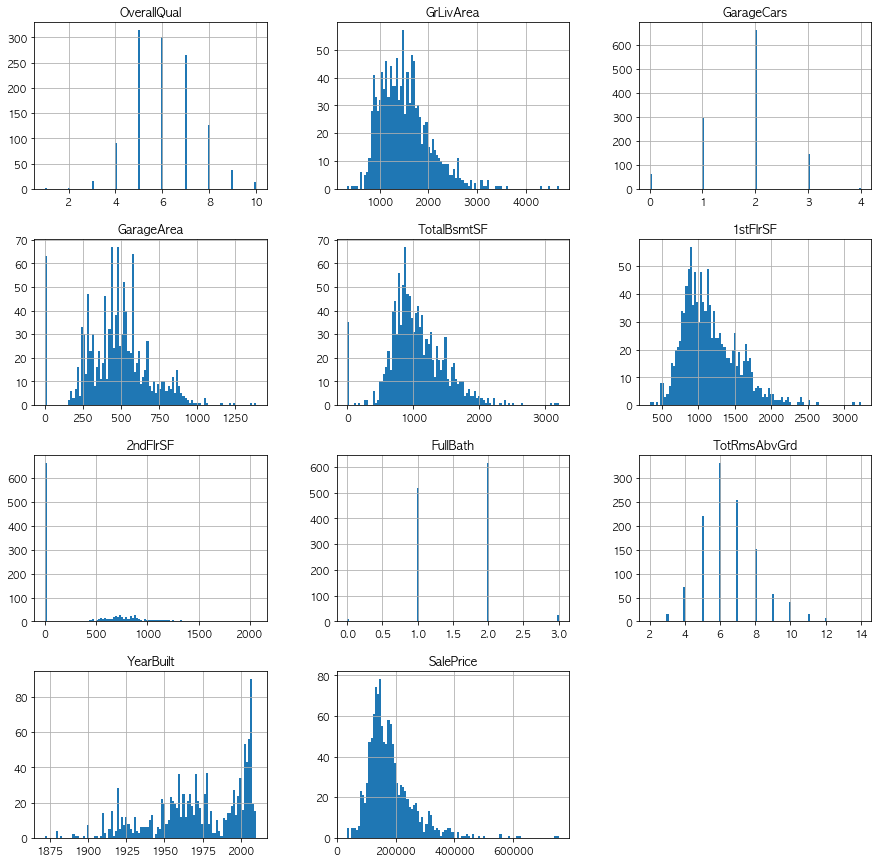

In [19]:
train_x_continuous.hist(bins=100, figsize=(15,15))

한쪽에 치우친 분포를 가진 feature는 target data(SalePrice)와 같이 한쪽으로 치우친 feature는 log변환을 통해서 정규분포처럼 맞춰줘야함

# 데이터 전처리

## log 변환

In [20]:
# preprocessing log transformation
preprocessing = [train_df, test_x]
skew_columns = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice'] # YearBuilt는 연도라서 제외

for dataset in preprocessing:
    for col in skew_columns:
        try: # test_x에는 SalePrice가 없어서 에러가 나기 때문에 try except문을 사용
            dataset[col] = np.log1p(dataset[col])
        except:
            pass

## 더미 변수 만들기

In [21]:
train_y = train_df['SalePrice']

In [22]:
train_df = pd.get_dummies(train_df).drop('SalePrice', axis=1)
test_x = pd.get_dummies(test_x)

Text(0.5, 1.0, 'correlation among independent variables')

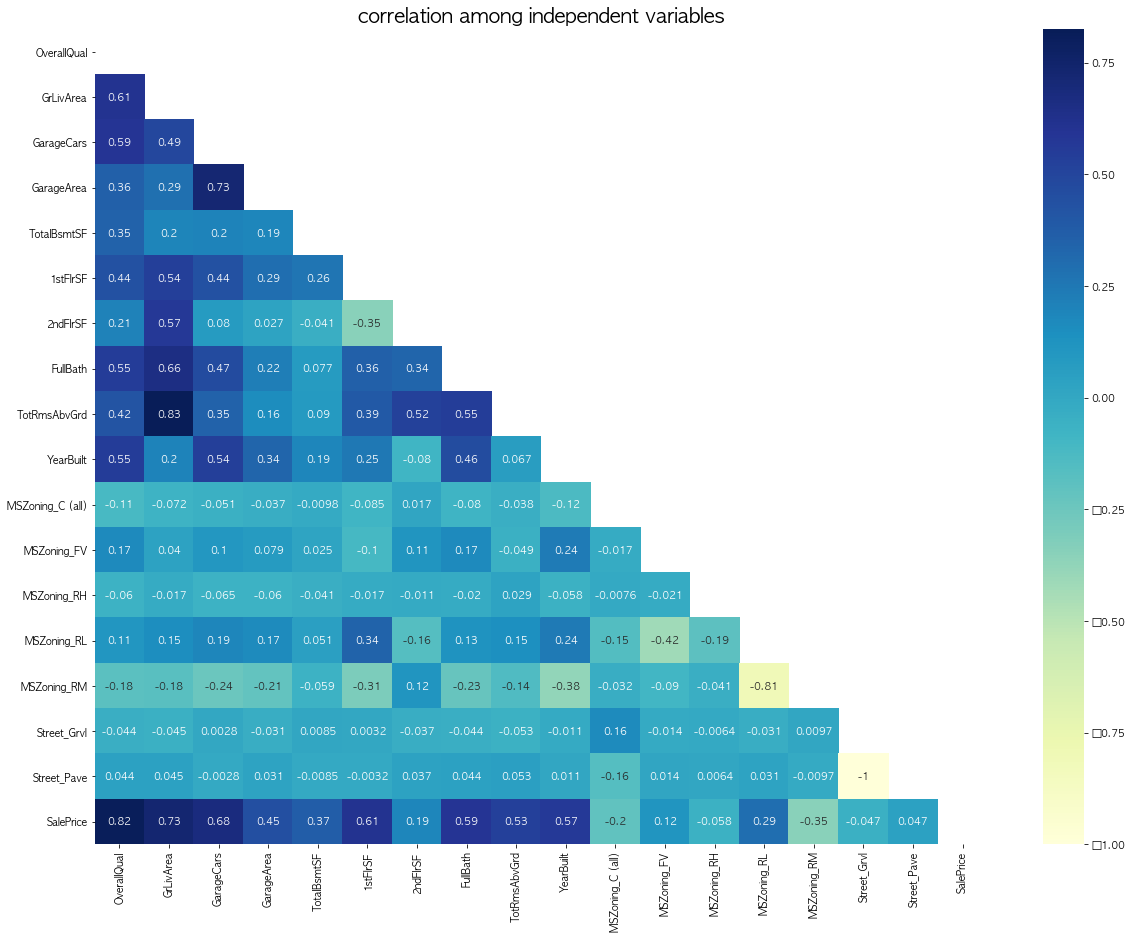

In [23]:
train_df = pd.concat([train_df, train_y], axis=1) # SalePrice를 마지막 열로 보내기위해서
plt.figure(figsize=(20, 15))
mask=np.zeros_like(train_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(train_df.corr(), cmap = 'YlGnBu', annot=True, mask=mask)
plt.title('correlation among independent variables', fontsize=20)

feature와 target data간의 상관관계가 낮은(약 0.3보다 낮은) feature들은 제거

In [24]:
train_df.drop(['2ndFlrSF', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave'], axis=1, inplace=True)
test_x.drop(['2ndFlrSF', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Pave'], axis=1, inplace=True)

# 데이터 분석

## 학습 및 예측을 위한 데이터 준비

In [25]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test = test_x.copy()
X_train.shape, Y_train.shape, X_test.shape

((1165, 11), (1165,), (292, 11))

## 머신러닝 기법을 통한 학습 및 예측

In [26]:
# 예측을 하는데 log-> exp로 변환과정이 포함되야한다.
from sklearn.metrics import mean_squared_error

def log_rmse(y_test, y_pred):
    return mean_squared_error(np.expm1(y_test), np.expm1(y_pred))

## LinearRegression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train , x_test , y_train , y_test = train_test_split(X_train , Y_train ,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(x_train ,y_train)
y_preds = lr.predict(x_test)

mse = log_rmse(y_test , y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 952019917.913 , RMSE : 30854.820
Variance score : 0.852
절편 값: 2.001495885689616
회귀 계수값: [ 0.1  0.4  0.1  0.   0.   0.1 -0.  -0.   0.   0.1  0. ]


In [29]:
# 회귀 계수 값 정렬
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_train.columns)
coeff.sort_values(ascending=False)

GrLivArea       0.4
OverallQual     0.1
GarageCars      0.1
1stFlrSF        0.1
MSZoning_RL     0.1
GarageArea      0.0
TotalBsmtSF     0.0
FullBath       -0.0
TotRmsAbvGrd   -0.0
YearBuilt       0.0
MSZoning_RM     0.0
dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train , x_test , y_train , y_test = train_test_split(X_train , Y_train ,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(x_train ,y_train)
y_preds = lr.predict(x_test)

mse = mean_squared_error(y_test , y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 0.020 , RMSE : 0.140
Variance score : 0.852
절편 값: 2.001495885689616
회귀 계수값: [ 0.1  0.4  0.1  0.   0.   0.1 -0.  -0.   0.   0.1  0. ]


## Ridge

In [30]:
from sklearn.linear_model import Ridge

rg_reg = Ridge(alpha=10)
rg_reg.fit(x_train ,y_train)
y_preds = rg_reg.predict(x_test)

mse = mean_squared_error(y_test , y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.020 , RMSE : 0.140
Variance score : 0.852


In [31]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0, 0.1, 1, 10, 100, 1000]}

rg_reg = Ridge()
grid_rg = GridSearchCV(rg_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_rg.fit(x_train, y_train)
print('best parameter:', grid_rg.best_params_)

rg_preds = grid_rg.predict(x_test)

mse = mean_squared_error(y_test , rg_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, rg_preds)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best parameter: {'alpha': 0.1}
MSE : 0.020 , RMSE : 0.140
Variance score : 0.852


## Lasso

In [32]:
from sklearn.linear_model import Lasso

ls_reg = Lasso(alpha=0.01)
ls_reg.fit(x_train ,y_train)
y_preds = ls_reg.predict(x_test)

mse = mean_squared_error(y_test , y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.022 , RMSE : 0.150
Variance score : 0.832


In [33]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1, 1, 10, 100]}

ls_reg = Lasso()
grid_ls = GridSearchCV(ls_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_ls.fit(x_train, y_train)
print('best parameter:', grid_ls.best_params_)

ls_preds = grid_ls.predict(x_test)

mse = mean_squared_error(y_test , ls_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, ls_preds)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameter: {'alpha': 0.001}
MSE : 0.020 , RMSE : 0.140
Variance score : 0.853


## RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf_reg.fit(x_train, y_train)
rf_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test , rf_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, rf_pred)))

MSE : 0.019 , RMSE : 0.137
Variance score : 0.860


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 500, 1000],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_reg = RandomForestRegressor()
rf_grid_cv = GridSearchCV(rf_reg, param_grid=params, cv=5, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)
print('최적 하이퍼 파라미터: ', rf_grid_cv.best_params_)

rf_pred = rf_grid_cv.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test , rf_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, rf_pred)))

##  XGBRegressor

In [30]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
xgb_reg.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=1)
xgb_pred = xgb_reg.predict(x_test)

mse = mean_squared_error(y_test , xgb_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, xgb_pred)))

[0]	validation_0-rmse:10.98169
[1]	validation_0-rmse:10.43577
[2]	validation_0-rmse:9.91714
[3]	validation_0-rmse:9.42444
[4]	validation_0-rmse:8.95638
[5]	validation_0-rmse:8.51173
[6]	validation_0-rmse:8.08933
[7]	validation_0-rmse:7.68807
[8]	validation_0-rmse:7.30624
[9]	validation_0-rmse:6.94347
[10]	validation_0-rmse:6.59888
[11]	validation_0-rmse:6.27141
[12]	validation_0-rmse:5.96030
[13]	validation_0-rmse:5.66476


[14]	validation_0-rmse:5.38328
[15]	validation_0-rmse:5.11652
[16]	validation_0-rmse:4.86302
[17]	validation_0-rmse:4.62265
[18]	validation_0-rmse:4.39495
[19]	validation_0-rmse:4.17699
[20]	validation_0-rmse:3.97151
[21]	validation_0-rmse:3.77570
[22]	validation_0-rmse:3.58904
[23]	validation_0-rmse:3.41232
[24]	validation_0-rmse:3.24475
[25]	validation_0-rmse:3.08488
[26]	validation_0-rmse:2.93278
[27]	validation_0-rmse:2.78847
[28]	validation_0-rmse:2.65145
[29]	validation_0-rmse:2.52178
[30]	validation_0-rmse:2.39815
[31]	validation_0-rmse:2.28031
[32]	validation_0-rmse:2.16827
[33]	validation_0-rmse:2.06199
[34]	validation_0-rmse:1.96091
[35]	validation_0-rmse:1.86557
[36]	validation_0-rmse:1.77454
[37]	validation_0-rmse:1.68891
[38]	validation_0-rmse:1.60651
[39]	validation_0-rmse:1.52887
[40]	validation_0-rmse:1.45496
[41]	validation_0-rmse:1.38395
[42]	validation_0-rmse:1.31722
[43]	validation_0-rmse:1.25336
[44]	validation_0-rmse:1.19331
[45]	validation_0-rmse:1.13597
[46]	val

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9], 
}
xgb_reg = XGBRegressor()
xgb_grid_cv = GridSearchCV(xgb_reg, param_grid=params, cv=5, n_jobs=-1)
xgb_grid_cv.fit(x_train, y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)], verbose=1)
print('최적 하이퍼 파라미터: ', xgb_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(xgb_grid_cv.best_score_))

xgb_pred = xgb_grid_cv.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test , xgb_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, xgb_pred)))

[0]	validation_0-rmse:10.40707
[1]	validation_0-rmse:9.37272
[2]	validation_0-rmse:8.44182
[3]	validation_0-rmse:7.60405
[4]	validation_0-rmse:6.84881
[5]	validation_0-rmse:6.16910
[6]	validation_0-rmse:5.55671
[7]	validation_0-rmse:5.00575
[8]	validation_0-rmse:4.50994
[9]	validation_0-rmse:4.06238
[10]	validation_0-rmse:3.66270
[11]	validation_0-rmse:3.30184
[12]	validation_0-rmse:2.97664
[13]	validation_0-rmse:2.68315
[14]	validation_0-rmse:2.42101
[15]	validation_0-rmse:2.18353
[16]	validation_0-rmse:1.97068
[17]	validation_0-rmse:1.77765
[18]	validation_0-rmse:1.60537
[19]	validation_0-rmse:1.44964
[20]	validation_0-rmse:1.30851
[21]	validation_0-rmse:1.18201
[22]	validation_0-rmse:1.06914
[23]	validation_0-rmse:0.96765
[24]	validation_0-rmse:0.87657
[25]	validation_0-rmse:0.79364
[26]	validation_0-rmse:0.72019
[27]	validation_0-rmse:0.65353
[28]	validation_0-rmse:0.59384
[29]	validation_0-rmse:0.54060
[30]	validation_0-rmse:0.49277
[31]	validation_0-rmse:0.44980
[32]	validation_0

# 제출 파일 생성

In [34]:
test_x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,MSZoning_RL,MSZoning_RM
0,6,7.055313,1,5.342334,6.760415,6.857514,1,5,1929,0,1
1,6,7.301822,1,5.993961,6.511745,6.698268,2,7,1925,0,0
2,8,7.463363,2,6.336826,7.463363,7.463363,2,5,1985,1,0
3,5,7.583248,0,0.000000,6.846943,6.932448,1,7,1911,0,0
4,5,7.221105,1,5.953243,6.759255,6.869014,1,7,1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
287,5,6.816736,1,5.866468,6.816736,6.816736,1,4,1962,1,0
288,5,6.716595,2,6.580639,6.716595,6.716595,1,4,1955,0,1
289,8,7.396335,3,6.781058,8.073091,7.396335,2,7,2003,1,0
290,8,7.524561,3,6.493754,6.912743,6.912743,2,7,1999,1,0


In [35]:
prediction = xgb_grid_cv.best_estimator_.predict(test_x)
prediction = np.expm1(prediction)

submission = pd.DataFrame({'SalePrice' : prediction})
submission.to_csv('submission.csv', index=False)